# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units="metric"
    city_url =f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | tunduru
City not found. Skipping...
Processing Record 9 of Set 1 | porto novo
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | acari
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | sinnamary
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | conakry
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | srednekolymsk
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | menongue
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | atuona
Proces

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,17.44,68,51,3.70,ZA,1679941021
1,aklavik,68.2191,-135.0107,-1.19,78,100,1.77,CA,1679941369
2,airai,-8.9266,125.4092,15.04,94,98,0.96,TL,1679941525
3,tasiilaq,65.6145,-37.6368,-9.91,79,7,1.75,GL,1679941363
4,cape town,-33.9258,18.4232,22.99,55,0,3.13,ZA,1679941203


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

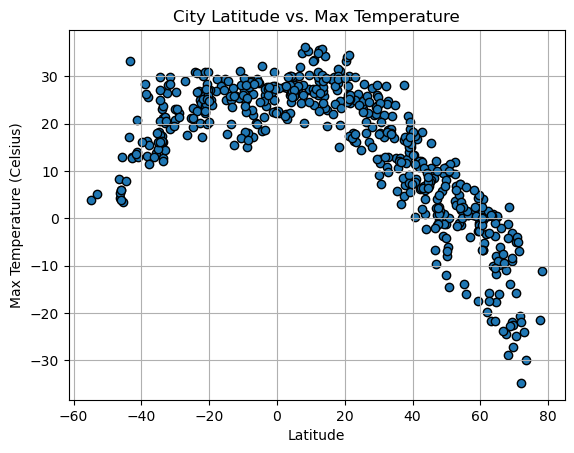

In [13]:
# Build scatter plot for latitude vs. temperature

x_lat = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]
plt.scatter(x_lat, y_temp, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

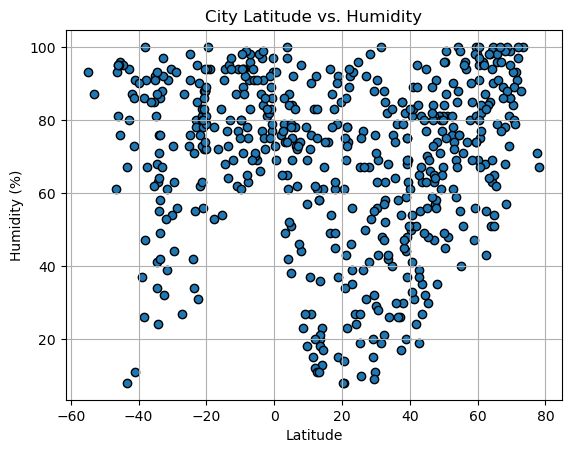

In [14]:
# Build the scatter plots for latitude vs. humidity
x_lat_humid = city_data_df["Lat"]
y_value_humid = city_data_df["Humidity"]
plt.scatter(x_lat_humid, y_value_humid, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

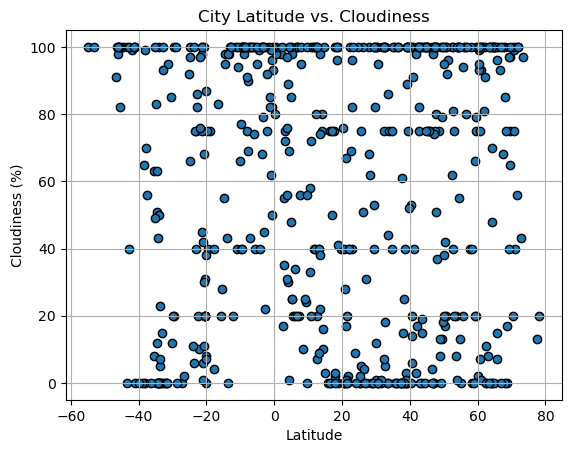

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_lat_cloud = city_data_df["Lat"]
y_value_cloud = city_data_df["Cloudiness"]
plt.scatter(x_lat_cloud, y_value_cloud, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

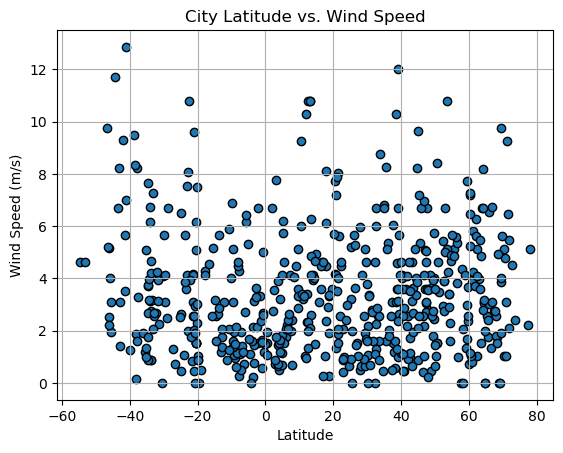

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_lat_wind = city_data_df["Lat"]
y_value_wind = city_data_df["Wind Speed"]
plt.scatter(x_lat_wind, y_value_wind, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,aklavik,68.2191,-135.0107,-1.19,78,100,1.77,CA,1679941369
3,tasiilaq,65.6145,-37.6368,-9.91,79,7,1.75,GL,1679941363
5,nome,64.5011,-165.4064,-7.96,100,100,3.09,US,1679941637
6,hilo,19.7297,-155.0900,24.79,85,40,3.58,US,1679941322
7,porto novo,6.4965,2.6036,27.90,73,100,2.22,BJ,1679941132


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,17.44,68,51,3.70,ZA,1679941021
2,airai,-8.9266,125.4092,15.04,94,98,0.96,TL,1679941525
4,cape town,-33.9258,18.4232,22.99,55,0,3.13,ZA,1679941203
9,ushuaia,-54.8000,-68.3000,3.79,93,100,4.63,AR,1679941316
10,acari,-15.4311,-74.6158,29.35,54,28,5.16,PE,1679941901


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.896127912855356


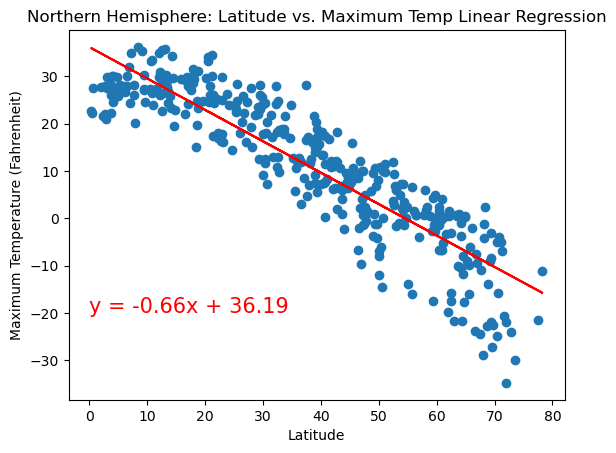

In [29]:
#Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Fahrenheit)')
plt.title(f'Northern Hemisphere: Latitude vs. Maximum Temp Linear Regression')

plt.annotate(line_eq,(0,-42),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.6097004235355731


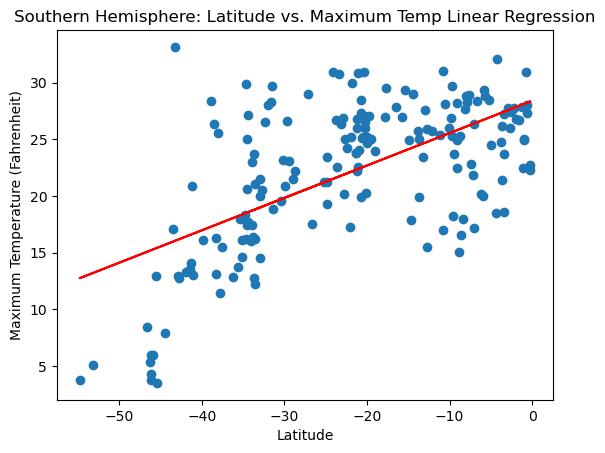

In [28]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Fahrenheit)')
plt.title(f'Southern Hemisphere: Latitude vs. Maximum Temp Linear Regression')

plt.annotate(line_eq,(0,-42),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

There is a strong relationship in the Northern Hemisphere between Lattitude and Maximum Temeprature. We observed a r-value of -0.89 which indicates a strong negative correlation meaning that the Maximum Temperature was high in the lower Latitudes and fell as the Latitude increased. On the other hand there is a moderately positive relationship between Temeprature and Latitude in the Southern Hemisphere. We observed a r-value of 0.609, this means that at the lower Latitudes, the temperature wasn't as high, and as Latitude climbs so does the temeprature." 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3346702148793922


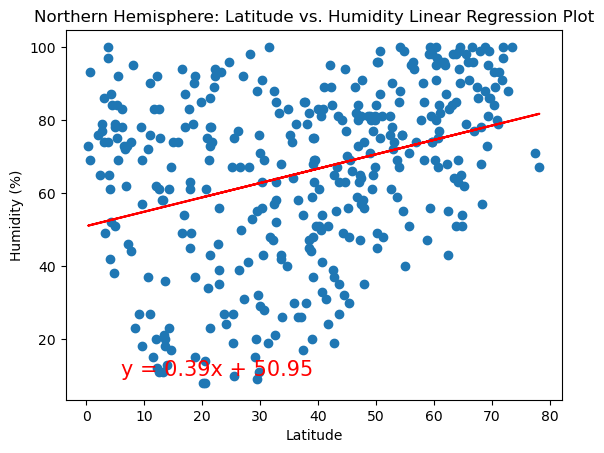

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity Linear Regression Plot')

print(f"The r-value is: {rvalue}")


The r-value is: 0.2288647233671039


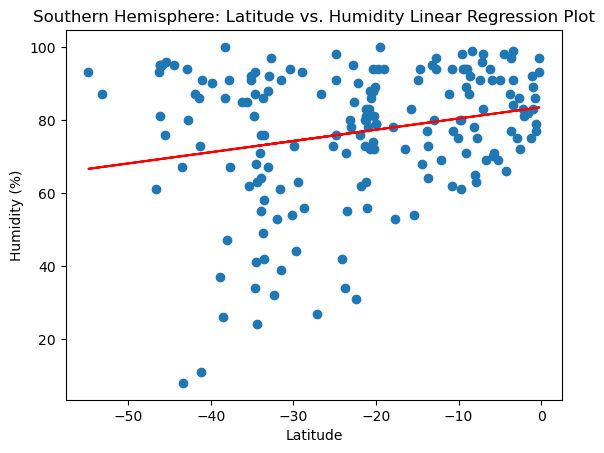

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity Linear Regression Plot')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

Unlike in the linear regression between latitude and temeperature, there are no strong or mild associations betwen Humidity and Latitude. Overall both Northern (r-value of 0.335) and Southern (r-value of 0.229) have weak relationships between their latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10493875375542065


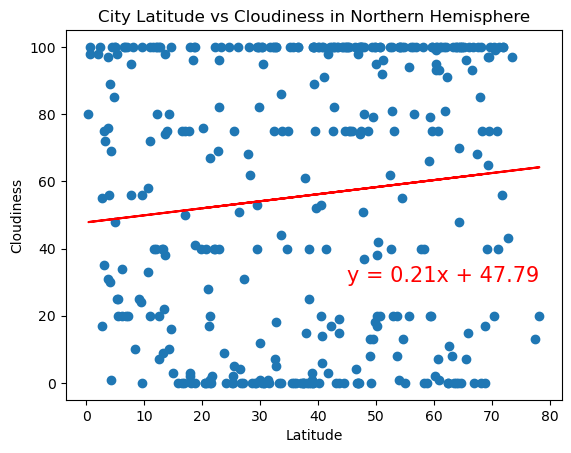

In [33]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(45, 30))

plt.title("City Latitude vs Cloudiness in Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")

The r-value is: 0.24186592507327898


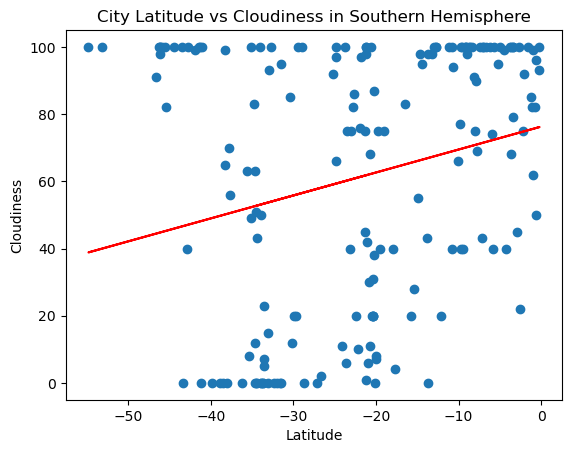

In [34]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(45, 30))

plt.title("City Latitude vs Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** 

As with the linear regression of humidity and latitude, both hemisphere demostrate a weak correlation between cloudiness and latitude. The r-value was 0.105 and 0.242 for the Northern and Southern Hemisphere respectively.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06459184743284527


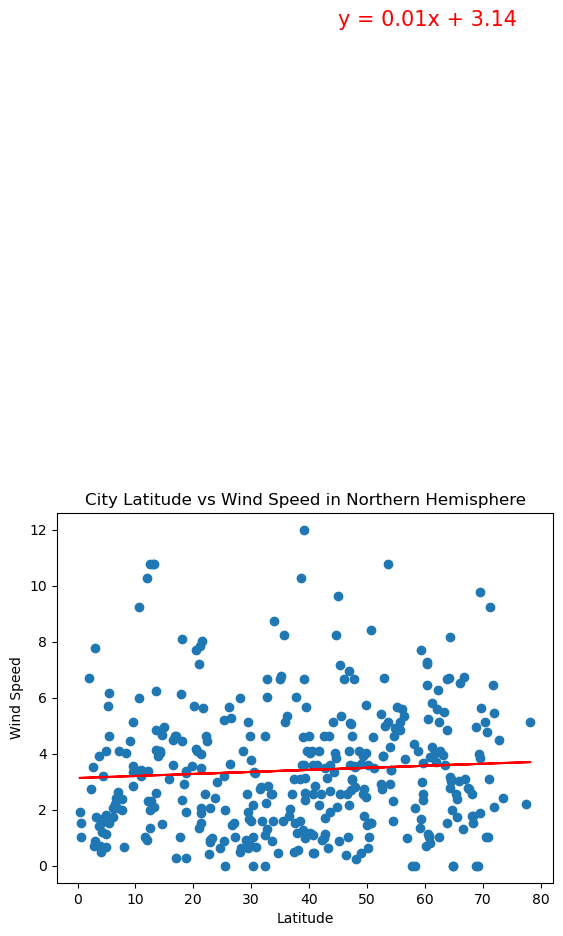

In [35]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(45, 30))

plt.title("City Latitude vs Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")


The r-value is: -0.3284626866952174


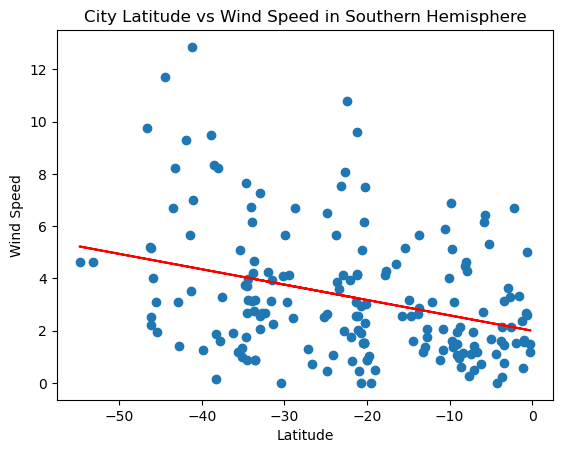

In [36]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red",xytext =(45, 30))

plt.title("City Latitude vs Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

There is a negligible correlation between wind speed in the Nothern Hemisphere and it's latitude, as observed with a r-value of 0.064 and a mild negative correlation betwen wind speed and latitude in the Southern Hemisphere, judging by the r-value of -0.328. The only logical way to interprete this would be that wind speed varies a lot and has no relationship to the latitude in the North and South Hemispheres.